In [1]:
%matplotlib inline

import os, subprocess, tarfile
from glob import glob
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy
import cartopy.crs as ccrs
from xhistogram.xarray import histogram

import warnings
warnings.filterwarnings('ignore')

seconds_per_day=60.*60.*24.
seconds_per_year=365.*seconds_per_day
carbon_molar_mass=12.011
cobalt_n_2_c = 106./16.
molN_to_gC = 6.625*12.011

In [2]:
path_root='/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT'

control,machine_target='OM4p5_CORE2_IAF_gzCOBALT-Control-062321','gfdl.ncrc4-intel16-prod'
case,machine_target='OM4p5_CORE2_IAF_gzCOBALT-013022','gfdl.ncrc4-intel19-prod'

In [3]:
short_casename=case.replace('OM4p5_CORE2_IAF_','')
if short_casename=="gzCOBALT-013022":
    fig_casename='ms_gzCOBALT'
else:
    fig_casename=short_casename
print(short_casename, fig_casename)

gzCOBALT-013022 ms_gzCOBALT


In [4]:
phyto_varlist = ['di', 'smp', 'lgp']
zoo_varlist = ['smz', 'mdz', 'lgz', 'smt', 'lgt']

In [5]:
tmpdir = '/work/Jessica.Luo/tmp/'+case
if not os.path.exists(tmpdir):
    os.mkdir(tmpdir)
    print('created directory: '+tmpdir)
else:
    print('temporary directory exists: '+tmpdir)

temporary directory exists: /work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022


In [6]:
# read in files
diagTypes = ['ocean_cobalt_omip_tracers_month_z', 'ocean_cobalt_omip_2d', \
             'ocean_cobalt_fluxes_int', 'ocean_cobalt_fdet_100', 'ocean_cobalt_tracers_int'] 

pp_dates='1988-2007'
#pp_dates='1968-1972'

files=[glob(tmpdir + '/'+ d + '.' + pp_dates + '*.nc') for d in diagTypes]

files=sorted([f for fi in files for f in fi]) # nested list comprehension
#print(files)

In [7]:
if not files:
    pp_path=os.path.join(path_root, case, machine_target, 'pp')
    
    files=[glob(pp_path + '/' + d + '/av/monthly_5yr/' + d + '.' + pp_dates + '*.nc') for d in diagTypes]
    
    files=sorted([f for fi in files for f in fi]) # nested list comprehension
    print(files)


In [8]:
grid_file=os.path.join(path_root, case, machine_target, 'pp')+'/ocean_annual/ocean_annual.static.nc'
ds=xr.open_mfdataset(files, combine='by_coords')
grid=xr.open_dataset(grid_file)

In [9]:
tmpdir = '/work/Jessica.Luo/tmp/'+control
if not os.path.exists(tmpdir):
    os.mkdir(tmpdir)
    print('created directory: '+tmpdir)
else:
    print('temporary directory exists: '+tmpdir)
    
# read in files
diagTypes = ['ocean_cobalt_omip_tracers_month_z', 'ocean_cobalt_omip_2d', \
             'ocean_cobalt_fluxes_int', 'ocean_cobalt_fdet_100', 'ocean_cobalt_tracers_int'] 

pp_dates='1988-2007'
#pp_dates='1993-1997'

c_files=[glob(tmpdir + '/'+ d + '.' + pp_dates + '*.nc') for d in diagTypes]

c_files=sorted([f for fi in c_files for f in fi]) # nested list comprehension

if not c_files:
    pp_path=os.path.join(path_root, control, machine_target, 'pp')
    
    c_files=[glob(pp_path + '/' + d + '/av/monthly_5yr/' + d + '.' + pp_dates + '*.nc') for d in diagTypes]
    
    c_files=sorted([f for fi in c_files for f in fi]) # nested list comprehension
    
print(c_files)

temporary directory exists: /work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321
['/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.1988-2007.01.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.1988-2007.02.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.1988-2007.03.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.1988-2007.04.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.1988-2007.05.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.1988-2007.06.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.1988-2007.07.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.1988-2007.08.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.

In [10]:
dc=xr.open_mfdataset(c_files, combine='by_coords')

In [11]:
ds['depth_levels']=xr.DataArray(ds.z_i.diff(dim='z_i').values, coords={'z_l':ds.z_l.values}, dims=['z_l'], attrs={'long_name':'Thickness of depth bin', 'units':'meters'})
ds.depth_levels

<xarray.DataArray 'depth_levels' (z_l: 35)>
array([  5. ,  10. ,  10. ,  15. ,  22.5,  25. ,  25. ,  25. ,  37.5,
        50. ,  50. ,  75. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 175. , 250. , 375. , 500. ,
       500. , 500. , 500. , 500. , 500. , 500. , 500. , 500. ])
Coordinates:
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Attributes:
    long_name:  Thickness of depth bin
    units:      meters

In [12]:
ds = ds.assign_coords(time=np.arange(1,13))
dc = dc.assign_coords(time=np.arange(1,13))


## Supplemental Figure - Biomes

In [15]:
# load biomes
biomes = xr.open_dataset('biomes/'+short_casename+'_'+pp_dates+'_biomes.nc')

# control biomes
cbiomes = xr.open_dataset('biomes/'+control.replace('OM4p5_CORE2_IAF_','')+'_'+pp_dates+'_biomes.nc')

In [23]:
#observational biomes
obs_biomes = xr.open_dataset('/work/jyl/validation_data/MLD_and_biomes/data_biomes_esm4grid.nc')
obs_thresh = '0.125 mg Chl m$^{-3}$'

In [18]:
thresh=biomes.biomes.attrs['chlorophyll-threshold']
cthresh=cbiomes.biomes.attrs['chlorophyll-threshold']
thresh=str.replace(thresh,'m^-3','m$^{-3}$')
cthresh=str.replace(cthresh,'m^-3','m$^{-3}$')

print(thresh)
print(cthresh)

0.185 mg Chl m$^{-3}$
0.184 mg Chl m$^{-3}$


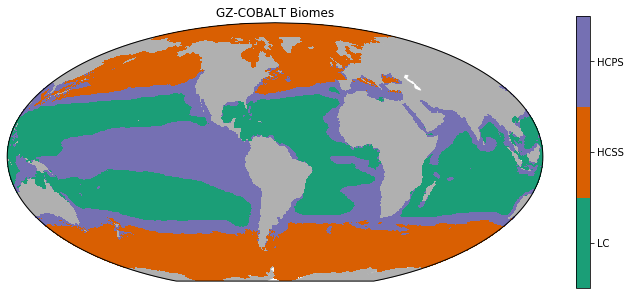

In [19]:
cmap = matplotlib.colors.ListedColormap(["#1b9e77", "#d95f02", "#7570b3"])
norm = matplotlib.colors.BoundaryNorm([1,2,3,4], cmap.N) 


plt.figure(figsize=(12,5))
ax=plt.axes(projection=ccrs.Mollweide(central_longitude=300.0))
cs=ax.pcolormesh(grid.geolon.values, grid.geolat.values, biomes.biomes, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
ax.add_feature(cartopy.feature.LAND, zorder=0, facecolor='#b0b0b0')
cbar=plt.colorbar(cs, ticks=[1.5,2.5,3.5])
cbar.ax.set_yticklabels(['LC', 'HCSS', 'HCPS'])
ax.set_title('GZ-COBALT Biomes')

plt.savefig('plots/'+fig_casename+'_'+pp_dates+'_Biomes.png', dpi=300, bbox_inches='tight')

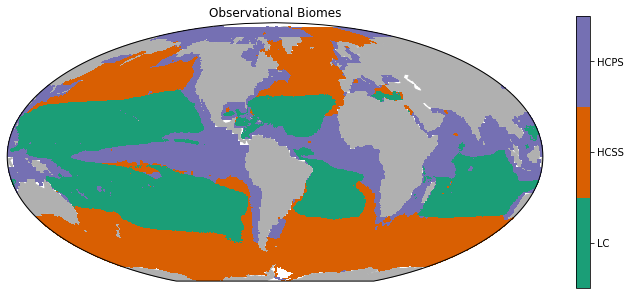

In [31]:
cmap = matplotlib.colors.ListedColormap(["#1b9e77", "#d95f02", "#7570b3"])
norm = matplotlib.colors.BoundaryNorm([1,2,3,4], cmap.N) 


plt.figure(figsize=(12,5))
ax=plt.axes(projection=ccrs.Mollweide(central_longitude=300.0))
cs=ax.pcolormesh(grid.geolon.values, grid.geolat.values, obs_biomes.biomes, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
ax.add_feature(cartopy.feature.LAND, zorder=0, facecolor='#b0b0b0')
cbar=plt.colorbar(cs, ticks=[1.5,2.5,3.5])
cbar.ax.set_yticklabels(['LC', 'HCSS', 'HCPS'])
ax.set_title('Observational Biomes')

plt.savefig('plots/'+fig_casename+'_'+pp_dates+'_ObsBiomes.png', dpi=300, bbox_inches='tight')

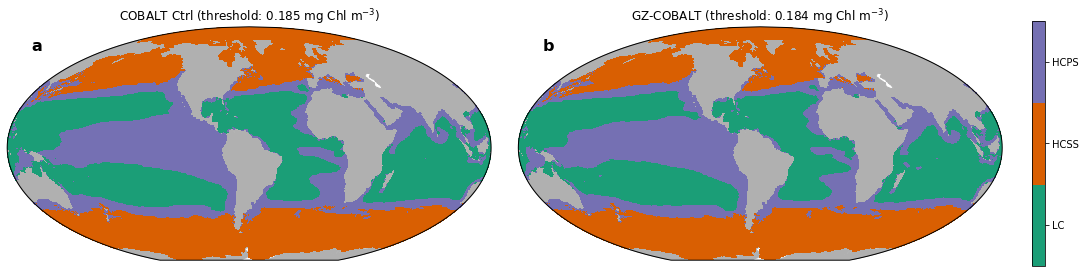

In [29]:
cmap = matplotlib.colors.ListedColormap(["#1b9e77", "#d95f02", "#7570b3"])
norm = matplotlib.colors.BoundaryNorm([1,2,3,4], cmap.N) 

fig=plt.figure(figsize=(20,6))
gs=gridspec.GridSpec(1,2, wspace=0.05, width_ratios=[1,1.25])

ax1 = plt.subplot(gs[0,0],projection=ccrs.Mollweide(central_longitude=300.0))

cs1=ax1.pcolormesh(grid.geolon.values, grid.geolat.values, cbiomes.biomes, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
ax1.add_feature(cartopy.feature.LAND, zorder=0, facecolor='#b0b0b0')
ax1.set_title('COBALT Ctrl (threshold: '+thresh+ ')' )
plt.gca().text(0.05, 0.95, 'a', transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top')


ax2=plt.subplot(gs[0,1], projection=ccrs.Mollweide(central_longitude=300.0))
cs2=ax2.pcolormesh(grid.geolon.values, grid.geolat.values, biomes.biomes, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
ax2.add_feature(cartopy.feature.LAND, zorder=0, facecolor='#b0b0b0')
ax2.set_title('GZ-COBALT (threshold: '+cthresh+ ')')
plt.gca().text(0.05, 0.95, 'b', transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top')

cbar=plt.colorbar(cs2, ticks=[1.5,2.5,3.5], shrink=0.75)
cbar.ax.set_yticklabels(['LC', 'HCSS', 'HCPS'])



plt.tight_layout()
plt.savefig('plots/'+fig_casename+'_'+pp_dates+'_COBALTCtrl_Biomes.png', dpi=300, bbox_inches='tight')

## Figure - Seasonal Cycle compared with Control

#### Shift southern hemisphere months

In [19]:
dss = ds.drop([v for v in ds if v not in ['nsmz_100','nmdz_100','nlgz_100','nsmt_100','nlgt_100']])
dcs = dc.drop([v for v in dc if v not in ['nsmz_100','nmdz_100','nlgz_100']])

In [20]:
for var in ['nsmz_100','nmdz_100','nlgz_100','nsmt_100','nlgt_100']:
    SH_subset = dss[var].where(ds.yh < 0,drop=True).values
    SH_subset = np.roll(SH_subset, shift=6, axis=0)
    full_field = dss[var].values
    full_field[:,0:np.size(SH_subset, axis=1),:] = SH_subset

    svar = var + '_shift'
    dss[svar] = xr.DataArray(full_field, dims=dss[var].dims, coords=dss[var].coords)

dss

<xarray.Dataset>
Dimensions:         (nv: 2, time: 12, xh: 720, yh: 576, z_i: 36, z_l: 35)
Coordinates:
  * xh              (xh) float64 -299.8 -299.2 -298.8 ... 58.75 59.25 59.75
  * yh              (yh) float64 -77.91 -77.72 -77.54 ... 89.47 89.68 89.89
  * z_l             (z_l) float64 2.5 10.0 20.0 32.5 ... 5.5e+03 6e+03 6.5e+03
  * z_i             (z_i) float64 0.0 5.0 15.0 ... 5.75e+03 6.25e+03 6.75e+03
  * time            (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * nv              (nv) float64 1.0 2.0
Data variables:
    nsmz_100        (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nmdz_100        (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nlgz_100        (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nsmt_100        (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nlgt_100        (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nsmz_100_shift  (time, yh, xh) float32 nan nan nan nan ... nan nan nan nan
    nmdz_100_shift  (time, yh, xh) float32 nan nan nan nan ... nan nan nan nan
    nlgz_100_shift  (time, yh, xh) float32 nan nan nan nan ... nan nan nan nan
    nsmt_100_shift  (time, yh, xh) float32 nan nan nan nan ... nan nan nan nan
    nlgt_100_shift  (time, yh, xh) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    filename:          ocean_cobalt_fdet_100.1988-1992.01.nc
    title:             OM4p5_CORE2_IAF_gzCOBALT-013022
    associated_files:  areacello: 19880101.ocean_static.nc
    grid_type:         regular
    grid_tile:         N/A
    comment:           FMS time averaging, version 3.0, precision=double
    history:           Wed Feb 16 10:32:11 2022: ncra -O /archive/Jessica.Luo...
    NCO:               netCDF Operators version 4.8.1 (Homepage = http://nco....

In [21]:
for var in ['nsmz_100','nmdz_100','nlgz_100']:
    SH_subset = dcs[var].where(dc.yh < 0,drop=True).values
    SH_subset = np.roll(SH_subset, shift=6, axis=0)
    full_field = dcs[var].values
    full_field[:,0:np.size(SH_subset, axis=1),:] = SH_subset

    svar = var + '_shift'
    dcs[svar] = xr.DataArray(full_field, dims=dcs[var].dims, coords=dcs[var].coords)

dcs

<xarray.Dataset>
Dimensions:         (nv: 2, time: 12, xh: 720, yh: 576, z_i: 36, z_l: 35)
Coordinates:
  * xh              (xh) float64 -299.8 -299.2 -298.8 ... 58.75 59.25 59.75
  * yh              (yh) float64 -77.91 -77.72 -77.54 ... 89.47 89.68 89.89
  * z_l             (z_l) float64 2.5 10.0 20.0 32.5 ... 5.5e+03 6e+03 6.5e+03
  * z_i             (z_i) float64 0.0 5.0 15.0 ... 5.75e+03 6.25e+03 6.75e+03
  * time            (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * nv              (nv) float64 1.0 2.0
Data variables:
    nsmz_100        (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nmdz_100        (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nlgz_100        (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nsmz_100_shift  (time, yh, xh) float32 nan nan nan nan ... nan nan nan nan
    nmdz_100_shift  (time, yh, xh) float32 nan nan nan nan ... nan nan nan nan
    nlgz_100_shift  (time, yh, xh) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    filename:          ocean_cobalt_fdet_100.1988-1992.01.nc
    title:             OM4p5_CORE2_IAF_gzCOBALT-Control-062321
    associated_files:  areacello: 19880101.ocean_static.nc
    grid_type:         regular
    grid_tile:         N/A
    comment:           FMS time averaging, version 3.0, precision=double
    history:           Tue Jul  6 13:48:31 2021: ncra -O /archive/Jessica.Luo...
    NCO:               netCDF Operators version 4.8.1 (Homepage = http://nco....

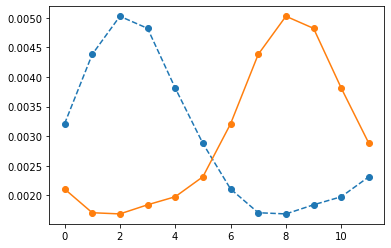

In [22]:
plt.plot(dss.nlgt_100.values[:,100,100],'o--')
plt.plot(dss.nlgt_100_shift.values[:,100,100], 'o-')

#### Plot

In [23]:
c1='#1b9e77'#'#440154FF'
c2='#d95f02'#'#21908CFF'
c3='#7570b3'#'#FDE725FF'

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=c1, lw=2),
                Line2D([0], [0], color=c2, lw=2),
                Line2D([0], [0], color=c3, lw=2),
                Line2D([0], [0], color=c1, ls='--', lw=2),
                Line2D([0], [0], color=c2, ls='--', lw=2),
                Line2D([0], [0], color=c3, ls='--', lw=2)]


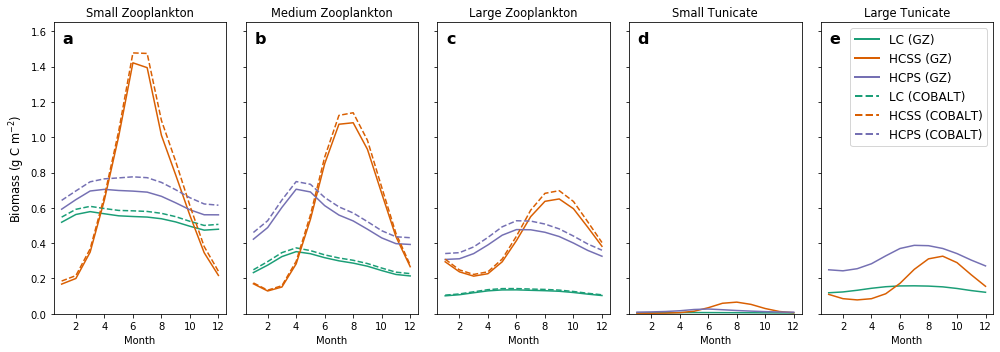

In [24]:
fig=plt.figure(figsize=(14,5))
gs=gridspec.GridSpec(1,5)

ymax1 = 1.65
fig.add_subplot(gs[0,0])
(dss.nsmz_100_shift.where(biomes.biomes==1).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c1, ylim=(0,ymax1))
(dss.nsmz_100_shift.where(biomes.biomes==2).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c2)
(dss.nsmz_100_shift.where(biomes.biomes==3).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c3)
(dcs.nsmz_100_shift.where(cbiomes.biomes==1).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c1,ls='--')
(dcs.nsmz_100_shift.where(cbiomes.biomes==2).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c2,ls='--')
(dcs.nsmz_100_shift.where(cbiomes.biomes==3).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c3,ls='--')
plt.gca().set_title('Small Zooplankton', fontsize=11.5)
plt.gca().set_ylabel('Biomass (g C m$^{-2}$)', fontsize=11.5)
plt.gca().set_xlabel('Month')
plt.gca().set_xticks(ticks=[2,4,6,8,10,12])
plt.gca().text(0.05, 0.97, 'a', transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top')


fig.add_subplot(gs[0,1])
(dss.nmdz_100_shift.where(biomes.biomes==1).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c1,ylim=(0,ymax1))
(dss.nmdz_100_shift.where(biomes.biomes==2).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c2)
(dss.nmdz_100_shift.where(biomes.biomes==3).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c3)
(dcs.nmdz_100_shift.where(cbiomes.biomes==1).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c1,ls='--')
(dcs.nmdz_100_shift.where(cbiomes.biomes==2).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c2,ls='--')
(dcs.nmdz_100_shift.where(cbiomes.biomes==3).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c3,ls='--')
plt.gca().set_title('Medium Zooplankton', fontsize=11.5)
plt.gca().set_ylabel('')
plt.gca().yaxis.set_ticklabels([])
plt.gca().set_xlabel('Month')
plt.gca().set_xticks(ticks=[2,4,6,8,10,12])
plt.gca().text(0.05, 0.97, 'b', transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top')


fig.add_subplot(gs[0,2])
(dss.nlgz_100_shift.where(biomes.biomes==1).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c1,ylim=(0,ymax1))
(dss.nlgz_100_shift.where(biomes.biomes==2).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c2)
(dss.nlgz_100_shift.where(biomes.biomes==3).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c3)
(dcs.nlgz_100_shift.where(cbiomes.biomes==1).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c1,ls='--')
(dcs.nlgz_100_shift.where(cbiomes.biomes==2).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c2,ls='--')
(dcs.nlgz_100_shift.where(cbiomes.biomes==3).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c3,ls='--')
plt.gca().set_title('Large Zooplankton', fontsize=11.5)
plt.gca().set_ylabel('')
plt.gca().yaxis.set_ticklabels([])
plt.gca().set_xlabel('Month')
plt.gca().set_xticks(ticks=[2,4,6,8,10,12])
plt.gca().text(0.05, 0.97, 'c', transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top')


ymax2 = ymax1
fig.add_subplot(gs[0,3])
(dss.nsmt_100_shift.where(biomes.biomes==1).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c1,ylim=(0,ymax2))
(dss.nsmt_100_shift.where(biomes.biomes==2).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c2)
(dss.nsmt_100_shift.where(biomes.biomes==3).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c3)
plt.gca().set_title('Small Tunicate', fontsize=11.5)
plt.gca().set_ylabel('')
plt.gca().yaxis.set_ticklabels([])
plt.gca().set_xlabel('Month')
plt.gca().set_xticks(ticks=[2,4,6,8,10,12])
plt.gca().text(0.05, 0.97, 'd', transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top')


fig.add_subplot(gs[0,4])
(dss.nlgt_100_shift.where(biomes.biomes==1).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c1,ylim=(0,ymax2))
(dss.nlgt_100_shift.where(biomes.biomes==2).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c2)
(dss.nlgt_100_shift.where(biomes.biomes==3).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c3)
plt.gca().set_title('Large Tunicate', fontsize=11.5)
plt.gca().set_ylabel('')
plt.gca().yaxis.set_ticklabels([])
plt.gca().set_xlabel('Month')
plt.gca().set_xticks(ticks=[2,4,6,8,10,12])
plt.gca().text(0.05, 0.97, 'e', transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top')
plt.legend(custom_lines,['LC (GZ)','HCSS (GZ)','HCPS (GZ)','LC (COBALT)','HCSS (COBALT)','HCPS (COBALT)'], fontsize=12)

plt.tight_layout()

plt.savefig('plots/'+fig_casename+'_'+pp_dates+'_SeasonalCycleBiomass-Comb.png', dpi=300, bbox_inches='tight')

[ -7.7772403  -7.078325   -6.974136   -7.785455   -9.26006   -10.421411
 -10.618124  -10.582137  -10.533208  -10.369859   -9.846221   -8.858166 ]
[-6.3703566 -6.77135   -6.505183  -5.7022753 -4.9186306 -4.794622
 -5.139885  -5.282949  -5.3036647 -5.462641  -5.5427995 -5.788705 ]


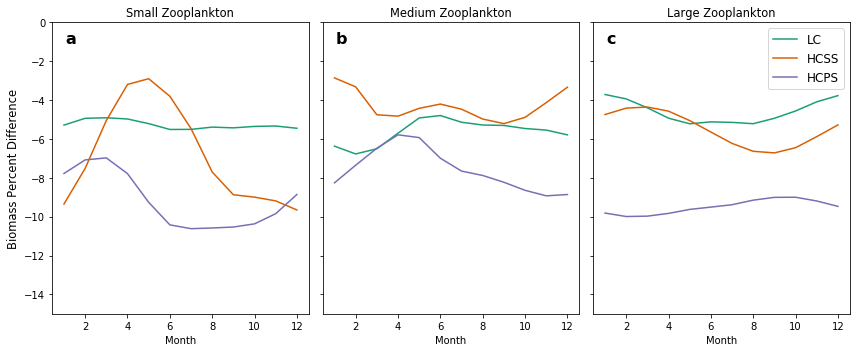

In [25]:
fig=plt.figure(figsize=(12,5))
gs=gridspec.GridSpec(1,3)

vmin=-15
vmax=0

fig.add_subplot(gs[0,0])
lcdiff = (dss.nsmz_100_shift.where(biomes.biomes==1).mean(dim=['xh','yh']) - dcs.nsmz_100_shift.where(cbiomes.biomes==1).mean(dim=['xh','yh']))/dcs.nsmz_100_shift.where(cbiomes.biomes==1).mean(dim=['xh','yh']) * 100
lcdiff.plot(c=c1, ylim=(vmin,vmax))
hcssdiff = (dss.nsmz_100_shift.where(biomes.biomes==2).mean(dim=['xh','yh']) - dcs.nsmz_100_shift.where(cbiomes.biomes==2).mean(dim=['xh','yh']))/dcs.nsmz_100_shift.where(cbiomes.biomes==2).mean(dim=['xh','yh']) * 100
hcssdiff.plot(c=c2, ylim=(vmin,vmax))
hcpsdiff = (dss.nsmz_100_shift.where(biomes.biomes==3).mean(dim=['xh','yh']) - dcs.nsmz_100_shift.where(cbiomes.biomes==3).mean(dim=['xh','yh']))/dcs.nsmz_100_shift.where(cbiomes.biomes==3).mean(dim=['xh','yh']) * 100
hcpsdiff.plot(c=c3, ylim=(vmin,vmax))
plt.gca().set_title('Small Zooplankton', fontsize=11.5)
plt.gca().set_ylabel('Biomass Percent Difference', fontsize=11.5)
plt.gca().set_xlabel('Month')
plt.gca().set_xticks(ticks=[2,4,6,8,10,12])
plt.gca().text(0.05, 0.97, 'a', transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top')

print(hcpsdiff.values)

fig.add_subplot(gs[0,1])
lcdiff = (dss.nmdz_100_shift.where(biomes.biomes==1).mean(dim=['xh','yh']) - dcs.nmdz_100_shift.where(cbiomes.biomes==1).mean(dim=['xh','yh']))/dcs.nmdz_100_shift.where(cbiomes.biomes==1).mean(dim=['xh','yh']) * 100
lcdiff.plot(c=c1, ylim=(vmin,vmax))
hcssdiff = (dss.nmdz_100_shift.where(biomes.biomes==2).mean(dim=['xh','yh']) - dcs.nmdz_100_shift.where(cbiomes.biomes==2).mean(dim=['xh','yh']))/dcs.nmdz_100_shift.where(cbiomes.biomes==2).mean(dim=['xh','yh']) * 100
hcssdiff.plot(c=c2, ylim=(vmin,vmax))
hcpsdiff = (dss.nmdz_100_shift.where(biomes.biomes==3).mean(dim=['xh','yh']) - dcs.nmdz_100_shift.where(cbiomes.biomes==3).mean(dim=['xh','yh']))/dcs.nmdz_100_shift.where(cbiomes.biomes==3).mean(dim=['xh','yh']) * 100
hcpsdiff.plot(c=c3, ylim=(vmin,vmax))
plt.gca().set_title('Medium Zooplankton', fontsize=11.5)
plt.gca().set_ylabel('')
plt.gca().yaxis.set_ticklabels([])
plt.gca().set_xlabel('Month')
plt.gca().set_xticks(ticks=[2,4,6,8,10,12])
plt.gca().text(0.05, 0.97, 'b', transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top')

print(lcdiff.values)

fig.add_subplot(gs[0,2])
lcdiff = (dss.nlgz_100_shift.where(biomes.biomes==1).mean(dim=['xh','yh']) - dcs.nlgz_100_shift.where(cbiomes.biomes==1).mean(dim=['xh','yh']))/dcs.nlgz_100_shift.where(cbiomes.biomes==1).mean(dim=['xh','yh']) * 100
lcdiff.plot(c=c1, ylim=(vmin,vmax))
hcssdiff = (dss.nlgz_100_shift.where(biomes.biomes==2).mean(dim=['xh','yh']) - dcs.nlgz_100_shift.where(cbiomes.biomes==2).mean(dim=['xh','yh']))/dcs.nlgz_100_shift.where(cbiomes.biomes==2).mean(dim=['xh','yh']) * 100
hcssdiff.plot(c=c2, ylim=(vmin,vmax))
hcpsdiff = (dss.nlgz_100_shift.where(biomes.biomes==3).mean(dim=['xh','yh']) - dcs.nlgz_100_shift.where(cbiomes.biomes==3).mean(dim=['xh','yh']))/dcs.nlgz_100_shift.where(cbiomes.biomes==3).mean(dim=['xh','yh']) * 100
hcpsdiff.plot(c=c3, ylim=(vmin,vmax))
plt.legend(['LC','HCSS','HCPS'], fontsize=12)
plt.gca().set_title('Large Zooplankton', fontsize=11.5)
plt.gca().set_ylabel('')
plt.gca().yaxis.set_ticklabels([])
plt.gca().set_xlabel('Month')
plt.gca().set_xticks(ticks=[2,4,6,8,10,12])
plt.gca().text(0.05, 0.97, 'c', transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top')

plt.tight_layout()

#  P/B plots

In [26]:
ds2 = ds.drop([v for v in ds if v not in ['nsmz_100','nmdz_100','nlgz_100','nsmt_100','nlgt_100', 'jprod_nsmz_100','jprod_nmdz_100','jprod_nlgz_100','jprod_nsmt_100','jprod_nlgt_100']])

In [27]:
ds2['PB_smz_month'] = ds2.jprod_nsmz_100 * 86400 / ds2.nsmz_100
ds2['PB_mdz_month'] = ds2.jprod_nmdz_100 * 86400 / ds2.nmdz_100
ds2['PB_lgz_month'] = ds2.jprod_nlgz_100 * 86400 / ds2.nlgz_100
ds2['PB_smt_month'] = ds2.jprod_nsmt_100 * 86400 / ds2.nsmt_100
ds2['PB_lgt_month'] = ds2.jprod_nlgt_100 * 86400 / ds2.nlgt_100

In [28]:
for var in ['PB_smz_month','PB_mdz_month','PB_lgz_month','PB_smt_month','PB_lgt_month']:
    SH_subset = ds2[var].where(ds.yh < 0,drop=True).values
    SH_subset = np.roll(SH_subset, shift=6, axis=0)
    full_field = ds2[var].values
    full_field[:,0:np.size(SH_subset, axis=1),:] = SH_subset

    svar = var + '_shift'
    ds2[svar] = xr.DataArray(full_field, dims=ds2[var].dims, coords=ds2[var].coords)

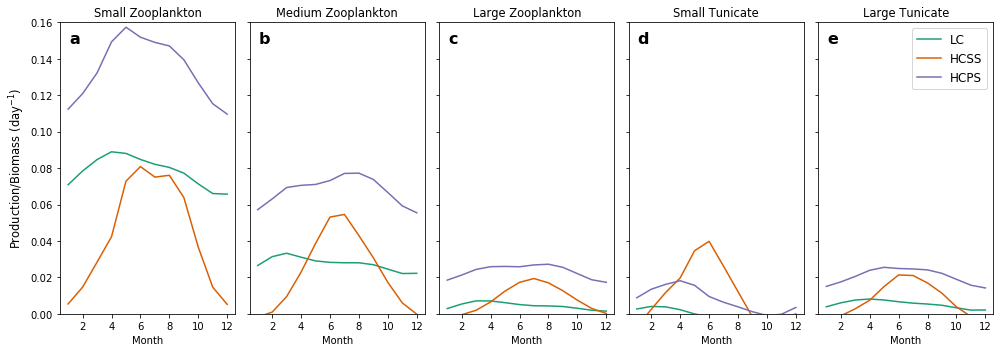

In [29]:

c1='#1b9e77'#'#440154FF'
c2='#d95f02'#'#21908CFF'
c3='#7570b3'#'#FDE725FF'

fig=plt.figure(figsize=(14,5))
gs=gridspec.GridSpec(1,5)

ymax1 = 0.16
fig.add_subplot(gs[0,0])
(ds2.PB_smz_month_shift.where(biomes.biomes==1).mean(dim=['xh','yh'])).plot(c=c1, ylim=(0,ymax1))
(ds2.PB_smz_month_shift.where(biomes.biomes==2).mean(dim=['xh','yh'])).plot(c=c2)
(ds2.PB_smz_month_shift.where(biomes.biomes==3).mean(dim=['xh','yh'])).plot(c=c3)
plt.gca().set_title('Small Zooplankton', fontsize=11.5)
plt.gca().set_ylabel('Production/Biomass (day$^{-1})$', fontsize=11.5)
plt.gca().set_xlabel('Month')
plt.gca().set_xticks(ticks=[2,4,6,8,10,12])
plt.gca().text(0.05, 0.97, 'a', transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top')


fig.add_subplot(gs[0,1])
(ds2.PB_mdz_month_shift.where(biomes.biomes==1).mean(dim=['xh','yh'])).plot(c=c1,ylim=(0,ymax1))
(ds2.PB_mdz_month_shift.where(biomes.biomes==2).mean(dim=['xh','yh'])).plot(c=c2)
(ds2.PB_mdz_month_shift.where(biomes.biomes==3).mean(dim=['xh','yh'])).plot(c=c3)
plt.gca().set_title('Medium Zooplankton', fontsize=11.5)
plt.gca().set_ylabel('')
plt.gca().yaxis.set_ticklabels([])
plt.gca().set_xlabel('Month')
plt.gca().set_xticks(ticks=[2,4,6,8,10,12])
plt.gca().text(0.05, 0.97, 'b', transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top')


fig.add_subplot(gs[0,2])
(ds2.PB_lgz_month_shift.where(biomes.biomes==1).mean(dim=['xh','yh'])).plot(c=c1,ylim=(0,ymax1))
(ds2.PB_lgz_month_shift.where(biomes.biomes==2).mean(dim=['xh','yh'])).plot(c=c2)
(ds2.PB_lgz_month_shift.where(biomes.biomes==3).mean(dim=['xh','yh'])).plot(c=c3)
plt.gca().set_title('Large Zooplankton', fontsize=11.5)
plt.gca().set_ylabel('')
plt.gca().yaxis.set_ticklabels([])
plt.gca().set_xlabel('Month')
plt.gca().set_xticks(ticks=[2,4,6,8,10,12])
plt.gca().text(0.05, 0.97, 'c', transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top')


ymax2 = ymax1
fig.add_subplot(gs[0,3])
(ds2.PB_smt_month_shift.where(biomes.biomes==1).mean(dim=['xh','yh'])).plot(c=c1,ylim=(0,ymax2))
(ds2.PB_smt_month_shift.where(biomes.biomes==2).mean(dim=['xh','yh'])).plot(c=c2)
(ds2.PB_smt_month_shift.where(biomes.biomes==3).mean(dim=['xh','yh'])).plot(c=c3)
plt.gca().set_title('Small Tunicate', fontsize=11.5)
plt.gca().set_ylabel('')
plt.gca().yaxis.set_ticklabels([])
plt.gca().set_xlabel('Month')
plt.gca().set_xticks(ticks=[2,4,6,8,10,12])
plt.gca().text(0.05, 0.97, 'd', transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top')


fig.add_subplot(gs[0,4])
(ds2.PB_lgt_month_shift.where(biomes.biomes==1).mean(dim=['xh','yh'])).plot(c=c1,ylim=(0,ymax2))
(ds2.PB_lgt_month_shift.where(biomes.biomes==2).mean(dim=['xh','yh'])).plot(c=c2)
(ds2.PB_lgt_month_shift.where(biomes.biomes==3).mean(dim=['xh','yh'])).plot(c=c3)
plt.gca().set_title('Large Tunicate', fontsize=11.5)
plt.gca().set_ylabel('')
plt.gca().yaxis.set_ticklabels([])
plt.gca().set_xlabel('Month')
plt.gca().set_xticks(ticks=[2,4,6,8,10,12])
plt.gca().text(0.05, 0.97, 'e', transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top')
plt.legend(['LC','HCSS','HCPS'], fontsize=12)


plt.tight_layout()

plt.savefig('plots/'+fig_casename+'_'+pp_dates+'_SeasonalCycle_ProdBiomass.png', dpi=300, bbox_inches='tight')